## Q_2) Salary_hike -> Build a prediction model for Salary_hike

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns 

In [2]:
df=pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\bhale\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


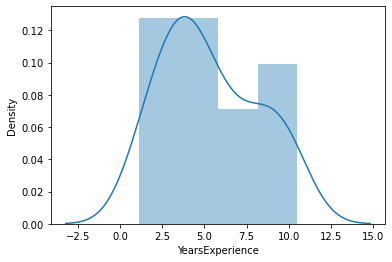

In [4]:
sns.distplot(df['YearsExperience']);

C:\Users\bhale\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


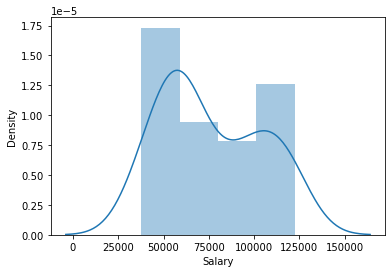

In [5]:
sns.distplot(df['Salary']);

In [6]:
corel=df.corr()

In [7]:
corel

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

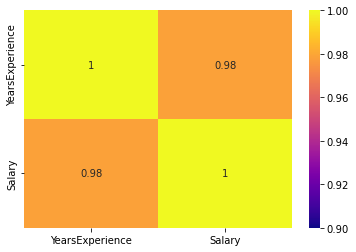

In [8]:
sns.heatmap(data=corel,
           annot=True,
           cmap='plasma',
           vmin=0.90,
           vmax=1)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

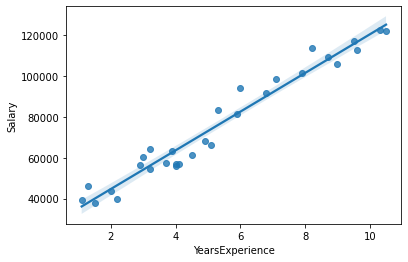

In [9]:
sns.regplot(x=df['YearsExperience'],y=df['Salary'])

In [10]:
q3=df['Salary'].quantile(0.75)
q1=df['Salary'].quantile(0.25)
q3,q1

(100544.75, 56720.75)

In [11]:
IQR=q3-q1
UB=q3+(1.5*IQR)
LB=q1-(1.5*IQR)
UB,LB

(166280.75, -9015.25)

In [12]:
from numpy.polynomial.polynomial import polyfit

In [13]:
x=df['YearsExperience']
y=df['Salary']

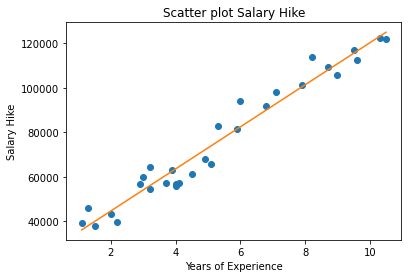

In [14]:
b, m = polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.title('Scatter plot Salary Hike')
plt.xlabel('Years of Experience')
plt.ylabel('Salary Hike')
plt.show()

## from above scatter plot ,we conclude that there is positive correlation between salary hike and years of experience 

## Regression Model

## 1. No transformation

In [15]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [16]:
model=sm.OLS(y,x).fit()
predictions=model.predict(x)

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    2.56e-24
Time:                        17:07:57   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
x_log=np.log(df['YearsExperience'])

In [19]:
model=sm.OLS(y,x_log).fit()
predictions=model.predict(x_log)

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              1338.
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    8.06e-26
Time:                        17:10:07   Log-Likelihood:                         -323.70
No. Observations:                  30   AIC:                                      649.4
Df Residuals:                      29   BIC:                                      650.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  4.909e+04   1341.796     36.583      0.000    4.63e+04    5.18e+04
==============================================================================
Omnibus:                       10.249   Durbin-Watson:                   0.421
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.950
Skew:                           1.106   Prob(JB):                       0.0114
Kurtosis:                       4.507   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log transformation of Y

In [21]:
y_log=np.sqrt(df['Salary'])

In [22]:
model=sm.OLS(y_log,x).fit()
predictions=model.predict(x)

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              278.1
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    2.12e-16
Time:                        17:22:19   Log-Likelihood:                         -175.75
No. Observations:                  30   AIC:                                      353.5
Df Residuals:                      29   BIC:                                      354.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience    43.7142      2.621     16.676      0.000      38.353      49.076
==============================================================================
Omnibus:                        2.437   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.859
Skew:                          -0.445   Prob(JB):                        0.395
Kurtosis:                       2.167   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log transformation of X and Y

In [24]:
model=sm.OLS(y_log,x_log).fit()
predictions=model.predict(x_log)

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              539.8
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    2.72e-20
Time:                        17:24:25   Log-Likelihood:                         -166.50
No. Observations:                  30   AIC:                                      335.0
Df Residuals:                      29   BIC:                                      336.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   165.2403      7.112     23.234      0.000     150.695     179.786
==============================================================================
Omnibus:                       11.272   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.186
Skew:                           1.321   Prob(JB):                      0.00614
Kurtosis:                       4.082   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## SQ root transformation of x

In [26]:
x_sqrt=np.sqrt(df['YearsExperience'])

In [27]:
model = sm.OLS(y, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              2697.
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    3.62e-30
Time:                        17:32:47   Log-Likelihood:                         -313.35
No. Observations:                  30   AIC:                                      628.7
Df Residuals:                      29   BIC:                                      630.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   3.48e+04    670.056     51.932      0.000    3.34e+04    3.62e+04
==============================================================================
Omnibus:                        5.654   Durbin-Watson:                   0.734
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                1.849
Skew:                          -0.040   Prob(JB):                        0.397
Kurtosis:                       1.786   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## SQ root transformation of y

In [29]:
y_sqrt=np.sqrt(df['Salary'])

In [30]:
model = sm.OLS(y_sqrt,x).fit()
predictions = model.predict(x)

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              278.1
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    2.12e-16
Time:                        17:38:56   Log-Likelihood:                         -175.75
No. Observations:                  30   AIC:                                      353.5
Df Residuals:                      29   BIC:                                      354.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience    43.7142      2.621     16.676      0.000      38.353      49.076
==============================================================================
Omnibus:                        2.437   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.859
Skew:                          -0.445   Prob(JB):                        0.395
Kurtosis:                       2.167   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## SQ root transformation of x and y

In [32]:
model = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              2338.
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    2.81e-29
Time:                        17:39:28   Log-Likelihood:                         -145.12
No. Observations:                  30   AIC:                                      292.2
Df Residuals:                      29   BIC:                                      293.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   118.8652      2.458     48.352      0.000     113.837     123.893
==============================================================================
Omnibus:                        2.762   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.152
Skew:                           0.653   Prob(JB):                        0.341
Kurtosis:                       2.881   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## CBRT transformation of X

In [35]:
x_cbrt=np.cbrt(df['YearsExperience'])

In [36]:
model = sm.OLS(y,x_cbrt).fit()
predictions = model.predict(x_cbrt)

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              1009.
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    4.42e-24
Time:                        17:41:42   Log-Likelihood:                         -327.84
No. Observations:                  30   AIC:                                      657.7
Df Residuals:                      29   BIC:                                      659.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  4.633e+04   1458.782     31.757      0.000    4.33e+04    4.93e+04
==============================================================================
Omnibus:                        7.627   Durbin-Watson:                   0.281
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.825
Skew:                           0.416   Prob(JB):                        0.244
Kurtosis:                       1.749   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## CBRT transformation of Y

In [38]:
y_cbrt=np.cbrt(df['Salary'])

In [39]:
model = sm.OLS(y_cbrt,x).fit()
predictions = model.predict(x)

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.871
Model:                            OLS   Adj. R-squared (uncentered):              0.866
Method:                 Least Squares   F-statistic:                              195.0
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    2.10e-14
Time:                        17:43:01   Log-Likelihood:                         -124.08
No. Observations:                  30   AIC:                                      250.2
Df Residuals:                      29   BIC:                                      251.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     6.5392      0.468     13.964      0.000       5.581       7.497
==============================================================================
Omnibus:                        2.943   Durbin-Watson:                   0.027
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.002
Skew:                          -0.437   Prob(JB):                        0.367
Kurtosis:                       2.085   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## CBRT transformation of X and Y

In [41]:
model = sm.OLS(y_cbrt,x_cbrt).fit()
predictions = model.predict(x_cbrt)

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              4351.
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    3.73e-33
Time:                        17:43:30   Log-Likelihood:                         -79.479
No. Observations:                  30   AIC:                                      161.0
Df Residuals:                      29   BIC:                                      162.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience    24.4274      0.370     65.963      0.000      23.670      25.185
==============================================================================
Omnibus:                        5.680   Durbin-Watson:                   0.210
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                4.375
Skew:                           0.921   Prob(JB):                        0.112
Kurtosis:                       3.328   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Output Interpretation

## We will use Model(CBRT Transformation of X and Y) as it has the best R square value=0.993

    1 - p-value < 0.01
    Thus the model is accepted

    2 - coefficient == 24.4274 Thus if the value of         years of experience is increased by 1, the predicted     value of Salary hike will increase by 24.4274

    3 - Adj. R-sqared == 0.993
    Thus the model explains 99.3% of the variance in         dependent variable